# EDA(basic stats & distribution)
- we conducted EDA to gain basic understanding of the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# loading the datasets

reviews = pd.read_csv('../assets/reviews_200p_cleaned.csv')
titles = pd.read_csv('../assets/titles_200p_cleaned.csv')
users = pd.read_csv('../assets/users_200p_cleaned.csv')
tags = pd.read_csv('../assets/tags_200p.csv')

In [3]:
reviews.head(2)

,review_id,title_id,title_english,title_romaji,user_id,score,rating,ratingCount,text_summary,text_body,lang,text_body_cleaned,text_body_cleaned_token
0,2791,30002,Berserk,Berserk,127937,85,23,53,This would be the first time i try tackling a ...,"Alrightee alrightee alrightee, here is my bers...",en,Alrightee alrightee alrightee berserk review f...,"['berserk', 'review', 'first', 'review', 'real..."
1,3811,30002,Berserk,Berserk,118781,100,191,208,One person's thoughts on one man's masterpiece.,This review contains spoilers.\n\nWhen one thi...,en,This review contains spoilers When one thinks ...,"['review', 'contains', 'spoilers', 'one', 'thi..."


In [4]:
titles.head(2)

,title_id,title_english,title_romaji,type,duration,start_year,chapters,volume,publishing_status,country,...,Sci-Fi,Slice of Life,Sports,Supernatural,Thriller,title_romaji_type,synopsis_cleaned,synopsis_source,synopsis_wc,synopsis_cleaned_token
0,30002,Berserk,Berserk,MANGA,NaN,1989.0,NaN,NaN,RELEASING,JP,...,0,0,0,0,0,Berserk_MANGA,His name Guts Black Swordsman feared warrior s...,Dark Horse,425,"['name', 'feared', 'warrior', 'spoken', 'whisp..."
1,31706,NaN,JoJo no Kimyou na Bouken: Steel Ball Run,MANGA,NaN,2004.0,95.0,24.0,FINISHED,JP,...,0,0,1,1,0,JoJo no Kimyou na Bouken: Steel Ball Run_MANGA,Originally presented unrelated story series la...,Wikipedia,346,"['presented', 'unrelated', 'story', 'series', ..."


In [5]:
users.head(2)

,user_id,about,avatar,about_lang,about_cleaned,about_cleaned_token
0,1,Admin of this site and AniChart.net.\n\n__I no...,https://s4.anilist.co/file/anilistcdn/user/ava...,en,Admin site AniChart net I longer handle data c...,"['site', 'net', 'longer', 'handle', 'data', 'c..."
1,2,__he/him â¢ Lead Community Mod & Developer__\...,https://s4.anilist.co/file/anilistcdn/user/ava...,en,Lead Community Mod Developer I watch anime ins...,"['watch', 'anime', 'instead', 'working', 'http..."


In [6]:
tags_groupby = tags.groupby('title_id').agg({'tag_name':list}).reset_index()
tags_groupby.head(2)

,title_id,tag_name
0,1,"[Space, Crime, Episodic, Ensemble Cast, Primar..."
1,5,"[Terrorism, Primarily Adult Cast, Martial Arts..."


array([[<AxesSubplot:title={'center':'score'}>]], dtype=object)

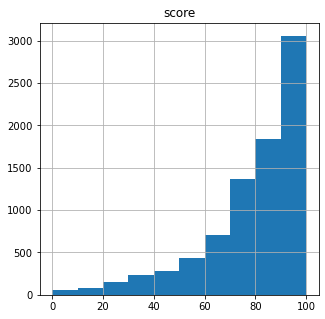

In [7]:
# review score distribution
reviews[['score']].hist(figsize =(5,5))

In [8]:
reviews[['score']].describe()

,score
count,8221.000000
mean,77.410656
std,20.896150
min,0.000000
25%,70.000000
50%,82.000000
75%,92.000000
max,100.000000


The scores given by the users are skewed to the left, which indicates that users generally give high scores when they review titles.

<AxesSubplot:>

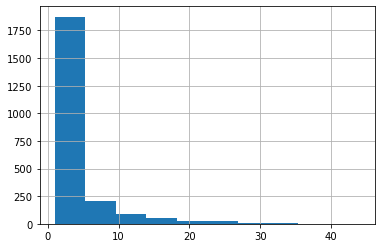

In [9]:
# title x number of reviews distribution
reviews.groupby('title_romaji')['review_id'].count().sort_values(ascending = False).hist()

The distribution of the number of reviews received for each title is highly skewed to the right, indicating that the comics/anime market follows a 'long-tail economy.'
The feature matrix for titles should be sparse given the distribution. Thus, we might need to decide what to do with the titles that received very few reviews.

<AxesSubplot:>

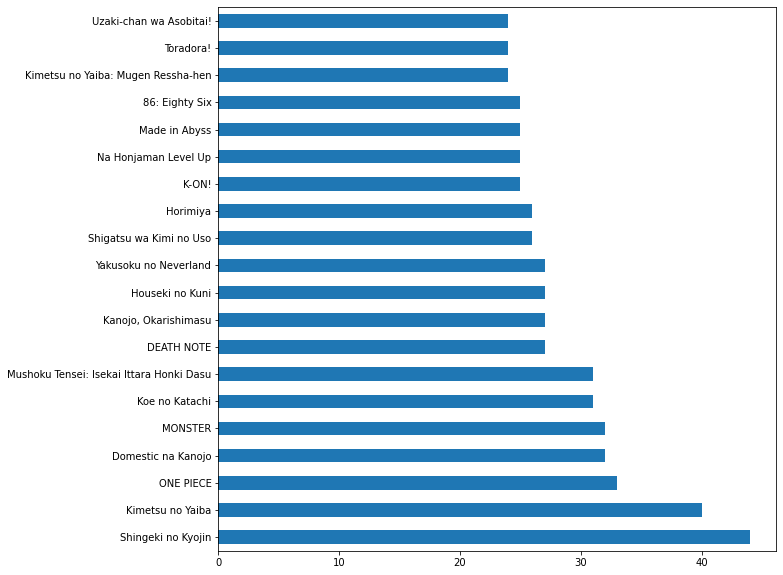

In [10]:
# titles that received the most reviews
reviews['title_romaji'].value_counts()[:20].plot(kind = 'barh', figsize = (10,10))

<AxesSubplot:>

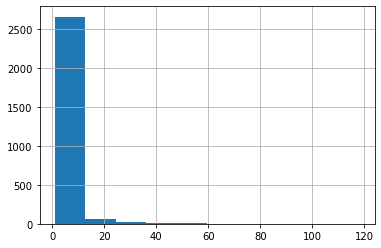

In [11]:
# user x number of reviews distribution
reviews[~reviews.user_id.str.contains(r'[a-zA-Z]+')].groupby('user_id')['review_id'].count().hist()

The distribution of the number of reviews posted by each user is also highly skewed to the right. We can presume that the similarity matrix of users for collaborative filtering should be sparse.

<AxesSubplot:>

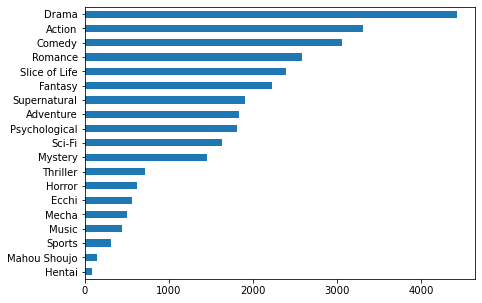

In [12]:
#the number of reviews each genre received
reviews.merge(titles[['title_id'] + titles.columns[34:-5].tolist()], how = 'left', on = 'title_id'
             )[titles.columns[34:-5]].sum().sort_values().plot(kind = 'barh', figsize = (7,5))

Drama is the most popular genre, followed by Action and Comedy

<AxesSubplot:>

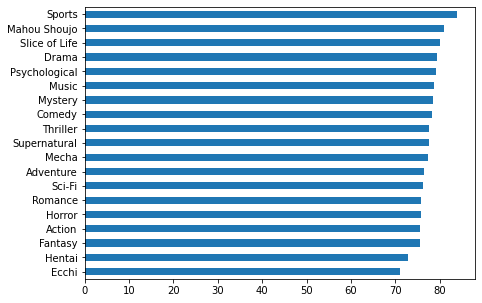

In [13]:
# average score by genre

genres = titles.columns[34:-5].tolist()
_df = reviews.merge(titles[['title_id'] + titles.columns[34:-5].tolist()], how = 'left', on = 'title_id')

genre_rating = {}
for genre in genres:
    genre_rating[genre] = _df.loc[lambda x : x[genre] == 1]['score'].mean()
    
pd.Series(genre_rating).sort_values().plot(kind = 'barh', figsize = (7,5))

<AxesSubplot:>

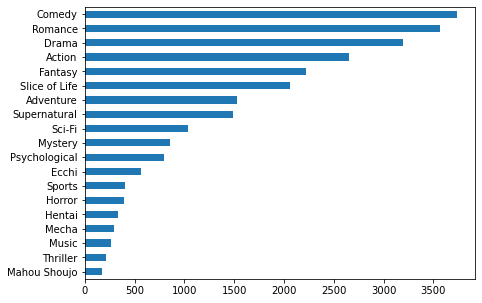

In [14]:
# distribution of genre in titles dataset
titles[titles.columns[34:-5].tolist()].sum().sort_values().plot(kind = 'barh', figsize = (7,5))

<AxesSubplot:>

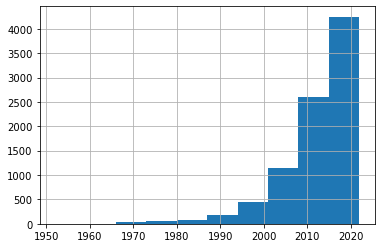

In [15]:
# distribution of the start year of the titles
titles['start_year'].hist()

The titles that came out recent have more records.

<AxesSubplot:>

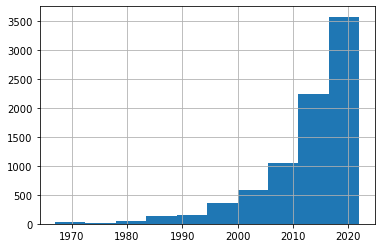

In [16]:
reviews.merge(titles[['title_id','start_year']], how = 'left', on = 'title_id')['start_year'].hist()

The more recent the titles, the more reviews they get.

<AxesSubplot:xlabel='start_year', ylabel='score'>

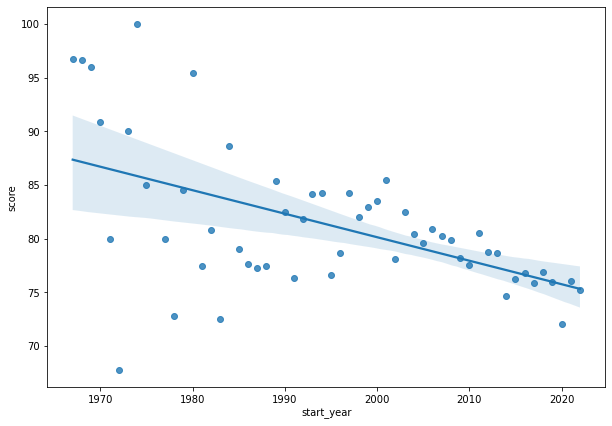

In [87]:
plt.figure(figsize = (10,7))
sns.regplot(
            data = reviews.merge(titles[['title_id','start_year']], how = 'left', on = 'title_id'
             ).groupby('start_year')['score'].mean().to_frame().reset_index(),
            x = 'start_year', y = 'score'
)

The titles that came out early tend to get higher review scores. But they also tend to have more variance in scores.

<AxesSubplot:>

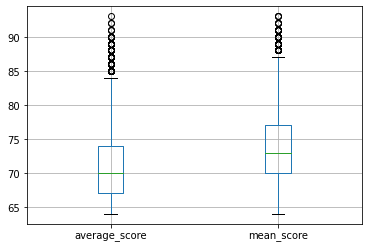

In [17]:
titles[['average_score','mean_score']].boxplot()

<AxesSubplot:>

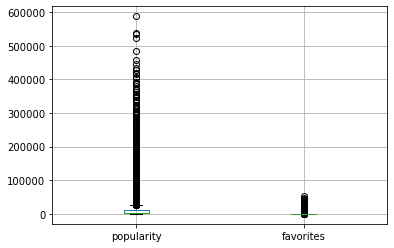

In [18]:
titles[['popularity','favorites']].boxplot()

array([[<AxesSubplot:title={'center':'average_score'}>,
        <AxesSubplot:title={'center':'mean_score'}>],
       [<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'favorites'}>]], dtype=object)

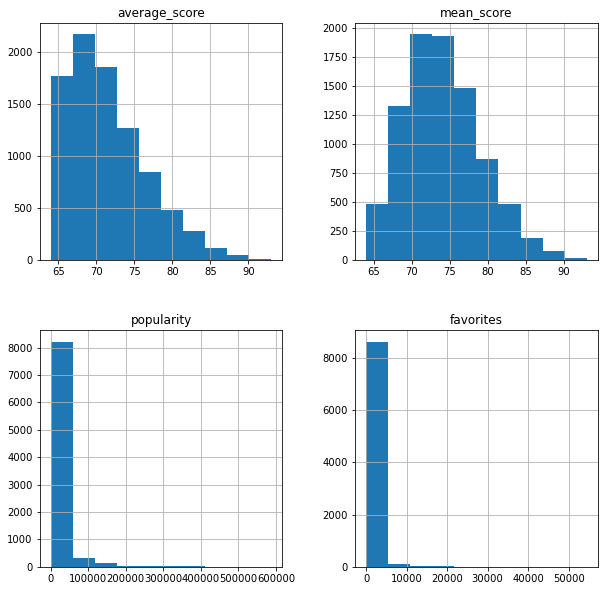

In [19]:
titles[['average_score','mean_score','popularity','favorites']].hist(figsize = (10,10))

Even though the users generally give out high scores, the distribution of average scores shows that most of the titles receive average scores around 65~70.

The distributions of popularity and favorits also show the long-tail economy of the market.

# Basic content-based filtering algorithm
We have used two basic approaches for building basic content-based filtering systems
- cosine similarity matrix of title-feature matrix
- cosine similarity matrix of title-latent factor matrix (using truncated SVD)

Features used are following:
- genres of titles
- tfidf vectorized synopsis (dimension reduced to 100)
- tfidf vectorized tags

In [20]:
#pip install nltk

In [21]:
# importing packages
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import nltk
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer 
from sklearn.metrics.pairwise import cosine_similarity

In [22]:
# nltk.download('punkt')
# nltk.download('wordnet')
#nltk.download('omw-1.4')

In [23]:
def tokenizer(sent):
    stemmer = SnowballStemmer(language = "english")
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(sent)
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    tokens = [stemmer.stem(token) for token in tokens]
    
    return tokens

In [24]:
# check tokenizer
tokenizer(titles.synopsis_cleaned.iloc[0])[:20]

['his',
 'name',
 'gut',
 'black',
 'swordsman',
 'fear',
 'warrior',
 'spoken',
 'whisper',
 'bearer',
 'gigant',
 'sword',
 'iron',
 'hand',
 'scar',
 'countless',
 'battl',
 'tortur',
 'flesh',
 'also']

In [25]:
# to deal with missing data
titles.synopsis_cleaned.loc[lambda x : x.isna()] = ''

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [26]:
# building a tfidf vector for the synopsis data
tfidf = TfidfVectorizer(tokenizer = tokenizer, ngram_range = (1,3), max_features = 10000)
tfidf_tokens = tfidf.fit_transform(titles.synopsis_cleaned)

In [27]:
tfidf_tokens

<8786x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 371344 stored elements in Compressed Sparse Row format>

In [28]:
# checking out the chosen tokens for the title 'Berserk'
np.where(tfidf_tokens.toarray()[0] != 0)

(array([ 112,  293,  394,  421,  422,  723,  741,  899, 1021, 1109, 1528,
        1653, 1697, 1741, 1767, 1775, 1846, 2104, 2138, 2288, 2295, 2371,
        2659, 2682, 2865, 2887, 2897, 2908, 3192, 3424, 3467, 3736, 3738,
        4217, 4698, 4757, 5220, 5693, 6165, 6349, 6783, 6910, 7171, 7272,
        7998, 8363, 8366, 8370, 8414, 8590, 8940, 9375, 9497, 9607]),)

In [29]:
np.array(tfidf.get_feature_names())[np.where(tfidf_tokens.toarray()[0] != 0)] # pretty dark stuff

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['accompani', 'also', 'annoy', 'anyon', 'anyon els', 'battl',
       'bearer', 'black', 'brand', 'but', 'companion', 'countless',
       'crimson', 'cut', 'damn', 'dark', 'death', 'doom', 'draw', 'elf',
       'els', 'enough', 'fate', 'fear', 'flesh', 'follow', 'foolish',
       'forc', 'gigant', 'gut', 'hand', 'his', 'his name', 'iron', 'lead',
       'lie', 'mark', 'name', 'oppos', 'path', 'rank', 'relentless',
       'sacrific', 'scar', 'spoken', 'sword', 'swordsman', 'symbol',
       'take', 'the', 'tortur', 'vengeanc', 'warrior', 'whisper'],
      dtype='<U27')

In [30]:
# since the tfidf matrix is too sparce, we will reduce the dimension of the tfidf vector to 100. 
pca = PCA(n_components = 100, random_state = 42)
tfidf_tokens_pca = pca.fit_transform(tfidf_tokens.toarray())
tfidf_tokens_pca.shape

(8786, 100)

In [31]:
# now let's move on to creating a tfidf vector for tags of the titles

tags_groupby.head()

,title_id,tag_name
0,1,"[Space, Crime, Episodic, Ensemble Cast, Primar..."
1,5,"[Terrorism, Primarily Adult Cast, Martial Arts..."
2,6,"[Guns, Fugitive, Philosophy, Male Protagonist,..."
3,7,"[Female Protagonist, Witch, Magic, Police, Con..."
4,15,"[American Football, Shounen, Male Protagonist,..."


In [32]:
def identity_tokenizer(text):
    return text

tfidf = TfidfVectorizer(tokenizer = identity_tokenizer, lowercase = False)
tfidf_tags = tfidf.fit_transform(tags_groupby.tag_name)

In [33]:
# checking out the tags for the title 'Berserk'

np.array(tfidf.get_feature_names())[np.where(tfidf_tags.toarray()[0] != 0)] # Makes sense

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['Amnesia', 'Anti-Hero', 'Crime', 'Cult', 'Cyberpunk', 'Cyborg',
       'Drugs', 'Ensemble Cast', 'Episodic', 'Gambling', 'Gender Bending',
       'Guns', 'LGBTQ+ Themes', 'Male Protagonist', 'Martial Arts',
       'Noir', 'Philosophy', 'Police', 'Primarily Adult Cast', 'Space',
       'Tanned Skin', 'Terrorism', 'Tragedy', 'Transgender', 'Travel',
       'Yakuza'], dtype='<U28')

In [34]:
# matching title_id with vectorized tags
tag_features = titles[['title_id']].merge(pd.concat([tags_groupby[['title_id']], pd.DataFrame(tfidf_tags.toarray())], axis = 1),
                           how = 'left',
                           on = 'title_id').drop('title_id', axis = 1)
print(tag_features.shape)
tag_features.head()

(8786, 329)


,0,1,2,3,4,5,6,7,8,9,...,319,320,321,322,323,324,325,326,327,328
0,0.0,0.0,0.192609,0.0,0.193102,0.0,0.000000,0.000000,0.181806,0.0,...,0.185892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.000000,0.0,0.000000,0.0,0.277371,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.145106,0.0,0.145477,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.151944
4,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.207328,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [35]:
# combine genre, synopsis, tag to create title-feature matrix
title_features = pd.concat([titles[genres], pd.DataFrame(tfidf_tokens_pca), tag_features], axis = 1)
title_features.index = titles['title_romaji']
title_features.head()

,Action,Adventure,Comedy,Drama,Ecchi,Fantasy,Hentai,Horror,Mahou Shoujo,Mecha,...,319,320,321,322,323,324,325,326,327,328
title_romaji,,,,,,,,,,,,,,,,,,,,,
Berserk,1,1,0,1,0,1,0,1,0,0,...,0.185892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
JoJo no Kimyou na Bouken: Steel Ball Run,1,1,0,1,0,0,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Gintama: THE FINAL,1,0,1,1,0,0,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
ONE PIECE,1,1,1,0,0,1,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.151944
Fruits Basket: The Final,0,0,1,1,0,0,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [36]:
# create a simple cosine similarity matrix
title_sim = pd.DataFrame(cosine_similarity(title_features.fillna(0)), 
                        columns = titles['title_romaji'], index = titles['title_romaji'])

In [37]:
title_sim.head()

title_romaji,Berserk,JoJo no Kimyou na Bouken: Steel Ball Run,Gintama: THE FINAL,ONE PIECE,Fruits Basket: The Final,Vagabond,Gintama°,MONSTER,Hagane no Renkinjutsushi: FULLMETAL ALCHEMIST,Kaguya-sama wa Kokurasetai: Ultra Romantic,...,Gakuen de Jikan yo Tomare,Kira Kira,.hack//G.U.+,.hack//Tasogare no Udewa Densetsu,Kakumei no Hi,Chimoguri Ringo to Kingyobachi Otoko,"Onii-chan, Asa made Zutto Gyutte Shite!",Katappashi Kara Zenbu Koi,WiSH VOYAGE,Maydare Tensei Monogatari: Kono Sekai de Ichiban Warui Majo
title_romaji,,,,,,,,,,,,,,,,,,,,,
Berserk,1.000000,0.456756,0.358338,0.550108,0.308869,0.594715,0.361770,0.382776,0.736446,0.184922,...,0.019283,-0.000487,0.378436,0.332811,0.191291,0.289395,-0.002656,-0.003199,0.001434,0.474566
JoJo no Kimyou na Bouken: Steel Ball Run,0.456756,1.000000,0.356503,0.391993,0.296470,0.583678,0.366350,0.375151,0.560514,0.013096,...,0.010338,-0.000696,0.191993,0.166701,0.204389,0.439101,-0.001919,-0.002044,0.032467,0.302383
Gintama: THE FINAL,0.358338,0.356503,1.000000,0.432309,0.350789,0.490172,0.901861,0.228798,0.441421,0.223064,...,-0.003144,-0.000113,0.441124,0.394285,0.435510,0.356855,-0.002113,0.242430,-0.000678,0.359485
ONE PIECE,0.550108,0.391993,0.432309,1.000000,0.184898,0.474353,0.434059,0.052504,0.662917,0.205152,...,0.009730,-0.002574,0.439370,0.595697,0.217957,0.341069,-0.001118,0.245323,-0.002955,0.537853
Fruits Basket: The Final,0.308869,0.296470,0.350789,0.184898,1.000000,0.196355,0.352034,0.370420,0.204956,0.695835,...,0.017458,-0.001774,-0.000119,0.165333,0.599718,0.566040,-0.001671,0.434369,-0.003512,0.476276


In [38]:
# to check sanity, filter out less popular titles
popular_title = titles.loc[lambda x : x.popularity > 10000].title_romaji.tolist()

In [39]:
# Let's check the performance of the first content-based filtering system

title_sim_popular = title_sim[popular_title]
title_sim_popular.loc['Berserk'].drop_duplicates().sort_values(ascending = False)[1:21].to_frame()
# For the title 'Berserk', the system pushed out some titles that give off 'dark' vibes, 
# such as 'Akame ga Kill' or 'Devilman'

,Berserk
title_romaji,
Akame ga Kill!,0.829227
Akame ga Kill!,0.806251
Devilman,0.800937
Berserk: Ougon Jidaihen III - Kourin,0.774407
Made in Abyss: Fukaki Tamashii no Reimei,0.771822
Berserk: Ougon Jidaihen II - Doldrey Kouryaku,0.770475
Kenpuu Denki Berserk,0.768079
Re:Zero kara Hajimeru Isekai Seikatsu 2nd Season,0.743874
Hagane no Renkinjutsushi: FULLMETAL ALCHEMIST,0.736446


In [40]:
title_sim_popular.loc['JoJo no Kimyou na Bouken: Steel Ball Run'].drop_duplicates().sort_values(ascending = False)[1:21].to_frame()

,JoJo no Kimyou na Bouken: Steel Ball Run
title_romaji,
JoJo no Kimyou na Bouken: Ougon no Kaze,0.831690
JoJo no Kimyou na Bouken: Ougon no Kaze,0.830678
JoJo no Kimyou na Bouken: Diamond wa Kudakenai,0.811467
JoJo no Kimyou na Bouken: JoJolion,0.755332
Kimetsu no Yaiba: Mugen Ressha-hen,0.750951
JoJo no Kimyou na Bouken: Stardust Crusaders,0.747002
Kimetsu no Yaiba: Mugen Ressha-hen (TV),0.737360
Modao Zushi 2,0.734795
JoJo no Kimyou na Bouken: Stardust Crusaders - Egypt-hen,0.733298


In [41]:
title_sim_popular.loc['Boku no Hero Academia'].drop_duplicates().iloc[0].sort_values(ascending = False)[1:21].to_frame()

,Boku no Hero Academia
title_romaji,
Boku no Hero Academia,1.000000
Hagane no Renkinjutsushi,0.850606
Hagane no Renkinjutsushi,0.850606
ONE PIECE,0.845511
ONE PIECE,0.845511
Magi,0.842804
Hagane no Renkinjutsushi: Milos no Seinaru Hoshi,0.842614
ONE PIECE: Heart of Gold,0.827073
ONE PIECE FILM: STRONG WORLD,0.824272


In [42]:
title_sim_popular.loc['Kidou Senshi Gundam Thunderbolt'].drop_duplicates().iloc[0].sort_values(ascending = False)[1:21].to_frame()

,Kidou Senshi Gundam Thunderbolt
title_romaji,
Aldnoah.Zero 2,0.888455
Kidou Senshi Gundam: THE ORIGIN,0.859849
Code Geass: Boukoku no Akito Saishuushou - Itoshiki Mono-tachi e,0.851703
Code Geass: Boukoku no Akito 3 - Kagayakumono Ten Yori Otsu,0.851521
Code Geass: Boukoku no Akito 4 - Nikushimi no Kioku Kara,0.850130
Code Geass: Boukoku no Akito 2 - Hikisakareshi Yokuryuu,0.837815
Kidou Senshi Gundam Thunderbolt,0.824797
Code Geass: Boukoku no Akito 1 - Yokuryuu wa Maiorita,0.821020
Full Metal Panic! Invisible Victory,0.805653


In [43]:
title_sim_popular.loc['Re:Zero kara Hajimeru Isekai Seikatsu'].drop_duplicates().iloc[0].sort_values(ascending = False)[1:21].to_frame()

,Re:Zero kara Hajimeru Isekai Seikatsu
title_romaji,
Re:Zero kara Hajimeru Isekai Seikatsu,1.000000
Re:Zero kara Hajimeru Isekai Seikatsu,0.948819
Re:Zero kara Hajimeru Isekai Seikatsu,0.948819
Re:Zero kara Hajimeru Isekai Seikatsu 2nd Season Part 2,0.941550
Re:Zero kara Hajimeru Isekai Seikatsu 2nd Season,0.881396
Akame ga Kill!,0.765405
Akame ga Kill!,0.765405
Fushigi Yuugi,0.731032
No Game No Life Zero,0.724420


In [44]:
# now let us apply some more complicated approach, that is utilizing title - latent factor matrix
# to achieve the matrix, we will use truncated SVD method

from sklearn.decomposition import TruncatedSVD

n_topics = 50
lsi = TruncatedSVD(n_components=n_topics, random_state=0)

reduced_term_matrix = lsi.fit_transform(title_features.fillna(0))
sig = np.diag(lsi.singular_values_)

print(reduced_term_matrix.shape)
print(sig.shape)
print(lsi.components_.shape)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


(8786, 50)
(50, 50)
(50, 448)


In [45]:
# now that we have title - latent factor matrix, we can create a cosine similarity matrix out of it
latent_mat = pd.DataFrame(reduced_term_matrix, index = titles['title_romaji'])
latent_sim = pd.DataFrame(cosine_similarity(latent_mat),
                         columns = titles['title_romaji'], index = titles['title_romaji'])

In [46]:
# to check sanity, filter out less popular titles
latent_sim_popular = latent_sim[popular_title]

In [47]:
# Let's check the performance 

latent_sim_popular.loc['Berserk'].drop_duplicates().sort_values(ascending = False)[1:21].to_frame()
# For the title 'Berserk', the system pushed out similar titles as the first system
# 'Akame ga Kill!' and 'Devilman' scored the highest

,Berserk
title_romaji,
Akame ga Kill!,0.906394
Devilman,0.891511
Akame ga Kill!,0.886937
Made in Abyss: Fukaki Tamashii no Reimei,0.850021
Kenpuu Denki Berserk,0.840108
Berserk: Ougon Jidaihen III - Kourin,0.836724
Berserk: Ougon Jidaihen II - Doldrey Kouryaku,0.832402
Re:Zero kara Hajimeru Isekai Seikatsu 2nd Season,0.825693
Hagane no Renkinjutsushi: FULLMETAL ALCHEMIST,0.819221


In [48]:
latent_sim_popular.loc['JoJo no Kimyou na Bouken: Steel Ball Run'].drop_duplicates().sort_values(ascending = False)[1:21].to_frame()

,JoJo no Kimyou na Bouken: Steel Ball Run
title_romaji,
JoJo no Kimyou na Bouken: Ougon no Kaze,0.911686
JoJo no Kimyou na Bouken: Ougon no Kaze,0.907372
JoJo no Kimyou na Bouken: Diamond wa Kudakenai,0.902215
JoJo no Kimyou na Bouken: JoJolion,0.827334
Kimetsu no Yaiba: Mugen Ressha-hen,0.823931
Modao Zushi,0.822542
Modao Zushi 2,0.821213
JoJo no Kimyou na Bouken: Stardust Crusaders - Egypt-hen,0.818978
Kimetsu no Yaiba: Mugen Ressha-hen (TV),0.816988


In [49]:
latent_sim_popular.loc['Boku no Hero Academia'].iloc[0].sort_values(ascending = False)[1:21].to_frame()

,Boku no Hero Academia
title_romaji,
Boku no Hero Academia,1.000000
ONE PIECE,0.986270
ONE PIECE,0.986270
Hagane no Renkinjutsushi,0.975161
Hagane no Renkinjutsushi,0.975161
Magi,0.972906
ONE PIECE FILM: GOLD,0.969529
ONE PIECE: Heart of Gold,0.966714
ONE PIECE STAMPEDE,0.962815


In [50]:
latent_sim_popular.loc['Re:Zero kara Hajimeru Isekai Seikatsu'].iloc[0].drop_duplicates().sort_values(ascending = False)[1:21].to_frame()

,Re:Zero kara Hajimeru Isekai Seikatsu
title_romaji,
Re:Zero kara Hajimeru Isekai Seikatsu,0.994154
Re:Zero kara Hajimeru Isekai Seikatsu 2nd Season Part 2,0.991684
Re:Zero kara Hajimeru Isekai Seikatsu 2nd Season,0.921506
Akame ga Kill!,0.844265
No Game No Life Zero,0.820313
JIN-ROH,0.816805
BANANA FISH,0.814501
Fushigi Yuugi,0.813840
"Sekai Saikou no Ansatsusha, Isekai Kizoku ni Tensei suru",0.766843


# Evaluating the systems
Now that we have the basic systems, let's see how well they perform.
The performance of the system will be measured with the following metrics:
- RMSE : squared sum of difference between actual scores and predicted scores
- Average Precision : number of relevant titles that are pushed by the system / number of all titles pushed by the system
- Average Recall : number relevant titles that are pushed by the system / number of all relevant titles 

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

In [52]:
user_scores = reviews[['title_romaji','title_id','user_id','score']].drop_duplicates()
user_scores = user_scores.loc[lambda x : x.user_id != 'Unknown']
user_scores.user_id = user_scores.user_id.astype(int)
user_scores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7969 entries, 0 to 8220
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title_romaji  7969 non-null   object
 1   title_id      7969 non-null   int64 
 2   user_id       7969 non-null   int64 
 3   score         7969 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 311.3+ KB


In [53]:
# split train/test dataset

train, test = train_test_split(user_scores, test_size=0.2, random_state=155851)

In [54]:
# make sure that
# - all the datasets contain title_ids that are in the titles dataframe
# - user_ids in the train dataset are also in the test dataset

train = train.loc[lambda x : x.title_id.isin(titles.title_id)]
test_mod = test.loc[lambda x : ~x.user_id.isin(set(test.user_id) - set(train.user_id)) & x.title_id.isin(titles.title_id)]

In [55]:
print(train.shape)
print(test_mod.shape)

(6348, 4)
(1271, 4)


In [56]:
# since there are duplicate title_ids with same title_romaji, set index of the cosine similarity matrix to title_ids

latent_sim_tid = latent_sim.copy()
latent_sim_tid.index = titles.title_id
latent_sim_tid.head(2)

title_romaji,Berserk,JoJo no Kimyou na Bouken: Steel Ball Run,Gintama: THE FINAL,ONE PIECE,Fruits Basket: The Final,Vagabond,Gintama°,MONSTER,Hagane no Renkinjutsushi: FULLMETAL ALCHEMIST,Kaguya-sama wa Kokurasetai: Ultra Romantic,...,Gakuen de Jikan yo Tomare,Kira Kira,.hack//G.U.+,.hack//Tasogare no Udewa Densetsu,Kakumei no Hi,Chimoguri Ringo to Kingyobachi Otoko,"Onii-chan, Asa made Zutto Gyutte Shite!",Katappashi Kara Zenbu Koi,WiSH VOYAGE,Maydare Tensei Monogatari: Kono Sekai de Ichiban Warui Majo
title_id,,,,,,,,,,,,,,,,,,,,,
30002,1.000000,0.514427,0.408303,0.618192,0.337783,0.697189,0.409474,0.421706,0.819221,0.210869,...,0.016340,0.000819,0.447536,0.387278,0.221453,0.338805,0.002499,-0.003984,-0.014835,0.516079
31706,0.514427,1.000000,0.413347,0.426591,0.338766,0.700597,0.416818,0.431015,0.620780,0.024684,...,0.014842,-0.023639,0.229112,0.198286,0.230890,0.494333,-0.002585,-0.001589,0.045876,0.338009


In [57]:
# Here we will walk you through how scores are predicted.
# We will predict the score of the titles in the test_dataset for the first user (user_id 118781)

test_users = test_mod.user_id.unique()
test_result = pd.DataFrame(columns = ['user_id', 'title_id', 'title_romaji', 'score_actual', 'score_predicted'])

user = test_users[0]
print(user)

# First, we will retrieve a cosine similarity matrix that contains the information about the similarities between 
# all the titles and titles that were reviewed and scored by the user
user_title_sim = latent_sim_tid.loc[train.loc[lambda x : x.user_id == user]['title_id']].sort_values('title_id')


# Next, we will retrieve scores of the titles that the user reviewed
user_score = train.loc[lambda x : x.user_id == user][['title_id','score']].sort_values('title_id')


display(user_title_sim)
display(user_score)

118781


title_romaji,Berserk,JoJo no Kimyou na Bouken: Steel Ball Run,Gintama: THE FINAL,ONE PIECE,Fruits Basket: The Final,Vagabond,Gintama°,MONSTER,Hagane no Renkinjutsushi: FULLMETAL ALCHEMIST,Kaguya-sama wa Kokurasetai: Ultra Romantic,...,Gakuen de Jikan yo Tomare,Kira Kira,.hack//G.U.+,.hack//Tasogare no Udewa Densetsu,Kakumei no Hi,Chimoguri Ringo to Kingyobachi Otoko,"Onii-chan, Asa made Zutto Gyutte Shite!",Katappashi Kara Zenbu Koi,WiSH VOYAGE,Maydare Tensei Monogatari: Kono Sekai de Ichiban Warui Majo
title_id,,,,,,,,,,,,,,,,,,,,,
32,0.556941,0.376371,0.662439,0.239281,0.375205,0.509538,0.658231,0.440754,0.453622,0.238931,...,0.013631,0.003047,0.495469,0.215489,0.249547,0.182906,0.004423,-0.002235,-0.010961,0.189780
170,0.194674,0.399610,0.469654,0.241090,0.576193,0.257769,0.463405,0.236884,0.255845,0.474015,...,0.013895,-0.027193,0.015634,0.256142,0.553545,0.403015,-0.002882,0.315169,0.115304,0.428271
392,0.398902,0.601503,0.474549,0.717071,0.405569,0.563720,0.471378,0.013601,0.498546,0.249382,...,0.007800,-0.044644,0.266830,0.469227,0.289099,0.404953,-0.003204,0.289652,0.019735,0.413863
522,0.393714,0.409165,0.464485,0.262875,0.384379,0.538944,0.477094,0.288534,0.484613,0.239416,...,0.003305,0.006514,0.292592,0.474167,0.503756,0.391054,-0.003786,0.271865,-0.013734,0.612370
918,0.401127,0.418731,0.988305,0.503157,0.401289,0.565948,0.990492,0.265476,0.499421,0.271197,...,0.004219,-0.007272,0.555653,0.490225,0.530018,0.413202,-0.000046,0.272991,0.007756,0.413609
1293,0.189045,0.190447,0.650574,0.228082,0.699959,0.249013,0.649185,0.210531,0.236544,0.658061,...,0.009292,0.010234,0.243300,0.424869,0.722982,0.540398,0.005777,0.511243,-0.007954,0.573426
1425,0.302263,0.313939,0.342644,0.676463,0.263031,0.397119,0.358202,0.095932,0.368846,0.361250,...,0.012217,-0.019679,0.018176,0.622171,0.347928,0.284922,-0.004700,0.360894,-0.010407,0.537357
1426,0.285718,0.299211,0.302729,0.643770,0.245839,0.381013,0.320329,0.095928,0.340343,0.337706,...,0.012932,-0.023415,0.012569,0.601781,0.333547,0.274219,-0.004855,0.350769,-0.007400,0.528206
1435,0.266699,0.476872,0.281250,0.568362,0.214211,0.357306,0.304169,0.336372,0.309333,0.277959,...,0.011895,-0.033640,0.017833,0.519714,0.292048,0.443866,-0.003340,0.305892,-0.009227,0.449933


,title_id,score
941,32,50
2036,170,90
1992,392,95
5887,522,100
1082,918,90
6000,1293,85
5159,1425,80
7142,1426,60
7482,1435,70
7636,6707,5


In [58]:
# Finally, we will retrieve the result of linear combination between the transposed cosine similarity matrix 
# and the score data and divide it by the sum of all the cosine similarities between a target title and 
# the titles that users scored to normalize the predicted scores.

weight_sum = user_title_sim.sum()
score_prediction = (user_title_sim.T.values @ user_score['score'].values)/weight_sum.values.flatten()
score_prediction_dict = dict(zip(titles.title_id, score_prediction))

In [59]:
user_test_titles = test_mod.loc[lambda x : x.user_id == user]
user_test_titles

,title_romaji,title_id,user_id,score
4273,Shaman King Kanzenban,42917,118781,90
893,Golden Kamuy,86559,118781,100
3082,Lupin III: Cagliostro no Shiro,1430,118781,100
2087,Dragon Ball,30042,118781,85
5628,Lupin III,1412,118781,85


In [60]:
# After the scores are predicted, they are accumulated in the test_result dataframe.

temp_df = user_test_titles[['user_id','title_id','title_romaji','score']]
temp_df['score_predicted'] = temp_df['title_id'].map(score_prediction_dict)
temp_df = temp_df.rename(columns = {'score':'score_actual'})
temp_df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,user_id,title_id,title_romaji,score_actual,score_predicted
4273,118781,42917,Shaman King Kanzenban,90,76.128654
893,118781,86559,Golden Kamuy,100,78.760082
3082,118781,1430,Lupin III: Cagliostro no Shiro,100,75.582904
2087,118781,30042,Dragon Ball,85,78.112426
5628,118781,1412,Lupin III,85,77.284606


In [61]:
test_result = pd.concat([test_result, temp_df])
test_result

,user_id,title_id,title_romaji,score_actual,score_predicted
4273,118781,42917,Shaman King Kanzenban,90,76.128654
893,118781,86559,Golden Kamuy,100,78.760082
3082,118781,1430,Lupin III: Cagliostro no Shiro,100,75.582904
2087,118781,30042,Dragon Ball,85,78.112426
5628,118781,1412,Lupin III,85,77.284606


In [62]:
# Now repeat the process for the users in the test dataset.

test_users = test_mod.user_id.unique()
test_result = pd.DataFrame(columns = ['user_id', 'title_id', 'title_romaji', 'score_actual', 'score_predicted'])

for user in tqdm(test_users):
    user_title_sim = latent_sim_tid.loc[train.loc[lambda x : x.user_id == user]['title_id']].sort_values('title_id')
    user_score = train.loc[lambda x : x.user_id == user][['title_id','score']].sort_values('title_id')
    weight_sum = user_title_sim.sum()
    score_prediction = (user_title_sim.T.values @ user_score['score'].values)/weight_sum.values.flatten()
    score_prediction_dict = dict(zip(titles.title_id, score_prediction))
    user_test_titles = test_mod.loc[lambda x : x.user_id == user]
    temp_df = user_test_titles[['user_id','title_id', 'title_romaji', 'score']]
    temp_df['score_predicted'] = temp_df['title_id'].map(score_prediction_dict)
    temp_df = temp_df.rename(columns = {'score':'score_actual'})
    test_result = pd.concat([test_result, temp_df])

  0%|                                                                  | 0/594 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
100%|████████████████████████████████████████████████████████| 594/594 [00:36<00:00, 16.08it/s]


In [63]:
# Now we have the actual scores and the predicted scores
test_result

,user_id,title_id,title_romaji,score_actual,score_predicted
4273,118781,42917,Shaman King Kanzenban,90,76.128654
893,118781,86559,Golden Kamuy,100,78.760082
3082,118781,1430,Lupin III: Cagliostro no Shiro,100,75.582904
2087,118781,30042,Dragon Ball,85,78.112426
5628,118781,1412,Lupin III,85,77.284606
...,...,...,...,...,...
2442,605768,1735,NARUTO: Shippuuden,88,88.000000
1359,668003,99426,Sora yori mo Tooi Basho,96,92.879454
2709,816330,21355,Re:Zero kara Hajimeru Isekai Seikatsu,40,100.000000
768,508744,1,Cowboy Bebop,93,91.868047


In [64]:
mse = mean_squared_error(y_true= test_result['score_actual'].values, y_pred=test_result['score_predicted'].values)
rmse = np.sqrt(mse)

print(rmse) # RMSE is 19.02, which doesn't seem pretty good

19.015483518009763


In [65]:
# To measure the average precision and recall, we designed the system to push 
# ten similar titles for each title that the user scored above 70. 

# We defined the 'relevant titles' as the titles that scored above 70 by the users

In [66]:
# we will walk you through the process by calculating the precision and recall for the user 386271
user = 386271

# First, we will retrieve a cosine similarity matrix that contains the information about the similarities between 
# all the titles and titles that were:
# 1. reviewed and scored by the user
# 2. scored above 70 by the user
user_title_sim = latent_sim_tid.loc[train.loc[lambda x : (x.user_id == user) & (x.score >= 70)]['title_id']].sort_values('title_id')
user_title_sim.columns = titles.title_id

# Next, we will retrieve a list of titles that the user scored above 70
user_score = train.loc[lambda x : x.user_id == user][['title_id','score']].sort_values('title_id')

# Next, the system will push ten titles that are similar to the titles scored above 70 by the user.
rec_title = []
for title in user_title_sim.index:
    rec_title += user_title_sim.loc[title].sort_values(ascending = False).index.tolist()[:10]

rec_title = list(set(rec_title) - set(user_title_sim.index))
print(rec_title)

[97858, 97859, 114308, 109957, 97860, 99141, 3594, 11977, 11979, 97808, 97371, 9756, 130591, 98143, 101474, 99557, 101863, 97769, 54637, 144946, 87027, 122292, 11061, 105398, 100791, 74485, 119806]


In [67]:
# Now, we will bring out the 'relevant titles' for the user and calculate the precision and recall.
user_test_titles = test_mod.loc[lambda x : (x.user_id == user) & (x.score >= 70)].title_id.tolist()
print(user_test_titles)

precision = len(pd.Series(rec_title).loc[lambda x : x.isin(user_test_titles)])/len(rec_title)
recall = len(pd.Series(rec_title).loc[lambda x : x.isin(user_test_titles)]) / len(user_test_titles)
precision, recall

[100791, 122292]


(0.07407407407407407, 1.0)

In [68]:
user_test_titles = test_mod.loc[lambda x : (x.user_id == user) & (x.score >= 70)]
title_name = titles.set_index('title_id')['title_romaji'].to_dict()
rec = pd.DataFrame(index = rec_title)
user_score['title_name'] = user_score.title_id.map(title_name)
rec['title_name'] = rec.index.map(title_name)

print('titles that were reviewed and scored by the user & scored above 70 by the user')
display(user_score)
print('titles that were pushed by the system')
display(rec)
print('relevant titles')
display(user_test_titles)

titles that were reviewed and scored by the user & scored above 70 by the user


,title_id,score,title_name
6106,20800,83,Yuuki Yuuna wa Yuusha de Aru
5062,122434,90,Heion Sedai no Idaten-tachi
7689,127366,82,100-man no Inochi no Ue ni Ore wa Tatteiru 2nd...


titles that were pushed by the system


,title_name
97858,Yuuki Yuuna wa Yuusha de Aru: Washio Sumi no S...
97859,Yuuki Yuuna wa Yuusha de Aru: Washio Sumi no S...
114308,Sword Art Online: Alicization - War of Underwo...
109957,Dubeon Saneun Ranker
97860,Yuuki Yuuna wa Yuusha de Aru: Washio Sumi no S...
99141,Dungeon ni Deai wo Motomeru no wa Machigatteir...
3594,Tears to Tiara
11977,Mahou Shoujo Madoka☆Magica Movie: Hajimari no ...
11979,Mahou Shoujo Madoka☆Magica Movie: Eien no Mono...
97808,Zer0game


relevant titles


,title_romaji,title_id,user_id,score
4775,Yuuki Yuuna wa Yuusha de Aru: Washio Sumi no Shou,100791,386271,84
6174,Yuuki Yuuna wa Yuusha de Aru: Dai-Mankai no Shou,122292,386271,89


In [69]:
precision = {}
recall = {}
for user in tqdm(test_users):
    user_title_sim = latent_sim_tid.loc[train.loc[lambda x : (x.user_id == user) & (x.score >= 70)]['title_id']].sort_values('title_id')
    user_score = train.loc[lambda x : (x.user_id == user) & (x.score >= 70)][['title_id','score']].sort_values('title_id')
    user_title_sim.columns = titles.title_id
    rec_title = []
    for title in user_title_sim.index:
        rec_title += user_title_sim.loc[title].sort_values(ascending = False).index.tolist()[:10]
  
    rec_title = list(set(rec_title) - set(user_title_sim.index))
    user_test_titles = test_mod.loc[lambda x : (x.user_id == user) & (x.score >= 70)].title_id.tolist()
    try:
        precision[user] = len(pd.Series(rec_title).loc[lambda x : x.isin(user_test_titles)])/len(rec_title)
        recall[user] = len(pd.Series(rec_title).loc[lambda x : x.isin(user_test_titles)])/len(user_test_titles)
    except:
        pass

  1%|▌                                                         | 6/594 [00:00<00:09, 59.86it/s]/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
100%|████████████████████████████████████████████████████████| 594/594 [00:06<00:00, 89.46it/s]


In [70]:
avg_precision = pd.Series(precision).mean()
avg_recall = pd.Series(recall).mean()
avg_precision, avg_recall # average precision and recall show we have a long way to go

(0.0053574584414195605, 0.10014344036779933)